# Import Required Libraries
Import the necessary libraries, including TensorFlow and Keras.

In [4]:
!pip install keras
!pip install tensorflow
# !pip install opencv-python
# !pip install opencv-python-headless
# !pip install matplotlib
# !pip install numpy
# !pip install pandas

  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.7/252.7 MB 57.8 MB/s eta 0:00:0000:0100:01
Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
Using cached flatbuffers-25.2.10-py2.py3-none-any.whl (30 kB)
Using cached gast-0.6.0-py3-none-any.whl (21 kB)
Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 47.0 MB/s eta 0:00:0000:01
Using cached li

In [5]:
# Import Required Libraries
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load MNIST Dataset
Load the MNIST dataset using Keras datasets module.

In [6]:
# Load MNIST Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape and normalize input data
x_train = x_train.reshape(x_train.shape[0], 28 * 28).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28 * 28).astype('float32') / 255

# One-hot encode target labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


The provided code snippet performs crucial preprocessing steps on the MNIST dataset, preparing it for training a neural network model.

Firstly, the MNIST dataset is loaded using the mnist.load_data() function. This function returns two tuples: (x_train, y_train) for the training data and (x_test, y_test) for the testing data. The dataset consists of grayscale images of handwritten digits, where each image has a size of 28x28 pixels. The x_train and x_test variables contain the image data, while y_train and y_test contain the corresponding labels indicating which digit each image represents.

Next, the input data undergoes reshaping and normalization. The reshape method transforms each 28x28 image into a one-dimensional array of 784 pixels (28 * 28). This flattening is necessary because the neural network expects input vectors rather than two-dimensional matrices. After reshaping, the data type of the pixel values is converted to float32 using the astype('float32') method. This conversion enhances computational efficiency during model training. The pixel values, which originally range from 0 to 255, are then normalized by dividing by 255. This scaling brings the values into the range of 0 to 1, which is beneficial for the training process as it helps the model converge more quickly and effectively.

Finally, the target labels (y_train and y_test) are one-hot encoded using the to_categorical function. One-hot encoding transforms each label, which is initially an integer representing the digit (0 through 9), into a binary vector of length 10. In this vector, the index corresponding to the digit is set to 1, and all other indices are set to 0. For example, if a label is 3, the one-hot encoded vector will be [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]. This encoding is essential for multi-class classification tasks, as it allows the neural network to output probabilities for each class, facilitating the calculation of loss and the optimization of model weights during training.

Overall, these preprocessing steps—loading the dataset, reshaping and normalizing the input data, and one-hot encoding the labels—are fundamental for preparing the MNIST data in a format that is suitable for training an effective neural network model.

 


In [7]:
# Verify data shapes
print('x_train shape:', x_train.shape)  # Should be (60000, 784)
print('y_train shape:', y_train.shape)  # Should be (60000, 10)

x_train shape: (60000, 784)
y_train shape: (60000, 10)


# Build the Model
Define the neural network architecture using Keras Sequential API.

In [8]:
# Build the Model
# Define the model

model = Sequential()
model.add(Dense(50, input_dim=28*28, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model's architecture
model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,760 (155.31 KB)

 Trainable params: 39,760 (155.31 KB)

 Non-trainable params: 0 (0.00 B)

The provided code snippet outlines the construction and compilation of a neural network model using Keras' Sequential API, tailored for the MNIST dataset, which consists of handwritten digit images. Here's a detailed breakdown of each component:

Model Initialization and Layer Addition The model begins with the initialization of a Sequential object, which signifies a linear stack of layers where each layer has exactly one input tensor and one output tensor. This simplicity makes the Sequential model ideal for straightforward architectures.

The first layer added to the model is a Dense layer with 50 neurons. The Dense layer is a fully connected layer where each neuron receives input from all neurons in the preceding layer. The input_dim parameter is set to 28*28, corresponding to the size of the flattened MNIST images (28 pixels in height and 28 pixels in width). This layer uses the ReLU (Rectified Linear Unit) activation function, which introduces non-linearity to the model by outputting the input directly if it is positive; otherwise, it outputs zero. The ReLU activation helps in mitigating the vanishing gradient problem, allowing the model to learn faster and perform better.

Following the Dense layer, a Dropout layer is incorporated with a dropout rate of 0.3. Dropout is a regularization technique used to prevent overfitting by randomly setting a fraction of input units to zero during training. In this case, 30% of the neurons in the preceding layer are temporarily ignored during each update cycle, encouraging the model to develop redundant representations and enhancing its generalization capabilities.

The final layer in the model is another Dense layer with 10 neurons, corresponding to the ten classes of digits (0 through 9) in the MNIST dataset. This layer employs the softmax activation function, which converts the raw output scores into probabilities that sum to one. The softmax function is ideal for multi-class classification problems as it highlights the most probable class for each input instance.

Model Compilation After defining the architecture, the model is compiled with specific configurations for the optimization process, loss calculation, and performance evaluation. The optimizer is set to 'adam', a popular choice known for its efficiency and capability to handle sparse gradients on noisy problems. The loss function used is categorical_crossentropy, appropriate for multi-class classification tasks where the labels are one-hot encoded. This loss function measures the discrepancy between the predicted probability distribution and the actual distribution of the labels. Additionally, the model is configured to track the accuracy metric, providing insight into the proportion of correctly classified instances during training and evaluation.

Model Summary Finally, the model.summary() function is invoked to display a detailed overview of the model's architecture. This summary includes information about each layer, such as its type, output shape, and the number of parameters it contains. It provides a quick way to verify the structure of the model and ensure that the layers are connected as intended.

Overall Workflow In summary, the code constructs a simple yet effective neural network for classifying MNIST digits. It begins with a fully connected layer that processes the input data, introduces dropout for regularization, and concludes with a softmax layer for classification. The model is then compiled with appropriate settings to prepare it for training. This structured approach ensures that the model is well-equipped to learn from the data while maintaining the ability to generalize to unseen examples.




# Compile the Model
Compile the model with appropriate loss function, optimizer, and metrics.

In [9]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Display the model's architecture
model.summary()  # Print the model summary to see the architecture and parameters

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,760 (155.31 KB)

 Trainable params: 39,760 (155.31 KB)

 Non-trainable params: 0 (0.00 B)

# Train the Model
Train the model using the training data.

In [10]:
# Train the model

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=512)


Epoch 1/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5673 - loss: 1.4050 - val_accuracy: 0.8996 - val_loss: 0.3858
Epoch 2/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8620 - loss: 0.4772 - val_accuracy: 0.9190 - val_loss: 0.2887
Epoch 3/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8912 - loss: 0.3759 - val_accuracy: 0.9292 - val_loss: 0.2448
Epoch 4/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9064 - loss: 0.3221 - val_accuracy: 0.9345 - val_loss: 0.2212
Epoch 5/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9148 - loss: 0.2953 - val_accuracy: 0.9417 - val_loss: 0.1998


# Evaluate the Model
Evaluate the model using the test data and print the results.

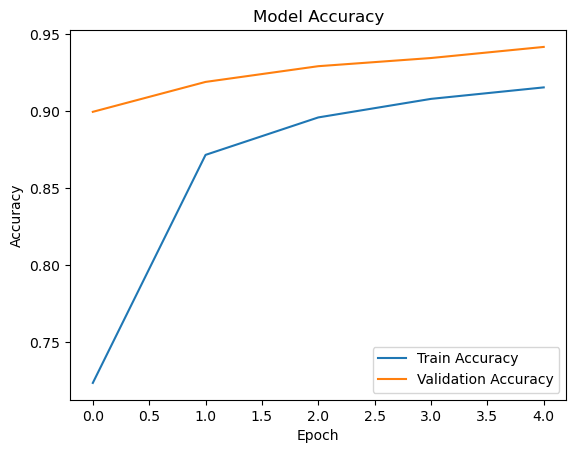

In [11]:
# Plot training history
def plot_history(history):
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

plot_history(history)

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score

# Make Predictions
y_pred_proba = model.predict(x_test)

# Convert Predictions to Class Labels
y_pred = np.argmax(y_pred_proba, axis=1)

# Convert One-Hot Encoded True Labels to Class Labels
y_true = np.argmax(y_test, axis=1)

# Evaluate the Model Using scikit-learn Metrics
print("Accuracy:", accuracy_score(y_true, y_pred))
print("\nClassification Report:\n", classification_report(y_true, y_pred))




313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 205us/step
Accuracy: 0.9417

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.97      0.98      0.98      1135
           2       0.94      0.93      0.93      1032
           3       0.92      0.94      0.93      1010
           4       0.93      0.95      0.94       982
           5       0.94      0.91      0.93       892
           6       0.95      0.96      0.95       958
           7       0.94      0.94      0.94      1028
           8       0.92      0.90      0.91       974
           9       0.93      0.92      0.93      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


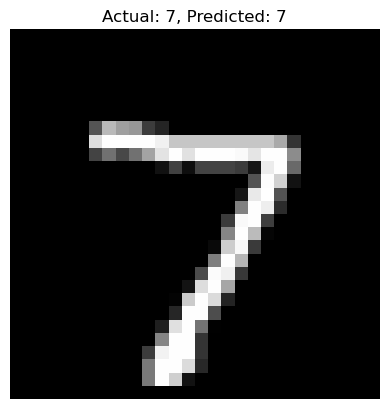

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Select a single data point
index = 0  # You can change this index to view different images
image = x_test[index].reshape(28, 28)
input_data = x_test[index].reshape(1, 28 * 28)

# Make prediction
prediction = model.predict(input_data)
predicted_label = np.argmax(prediction)
actual_label = np.argmax(y_test[index])

# Plot the image
plt.imshow(image, cmap='gray')
plt.title(f'Actual: {actual_label}, Predicted: {predicted_label}')
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


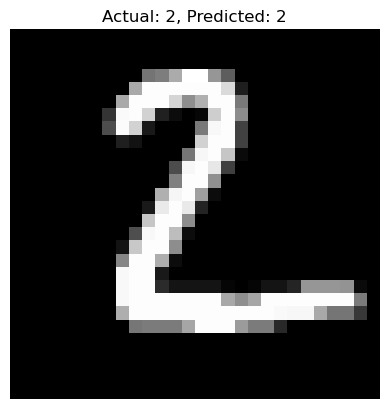

In [14]:
# Select a single data point
index = 1  # You can change this index to view different images
image = x_test[index].reshape(28, 28)
input_data = x_test[index].reshape(1, 28 * 28)

# Make prediction
prediction = model.predict(input_data)
predicted_label = np.argmax(prediction)
actual_label = np.argmax(y_test[index])

# Plot the image
plt.imshow(image, cmap='gray')
plt.title(f'Actual: {actual_label}, Predicted: {predicted_label}')
plt.axis('off')
plt.show()